In [152]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML algorithms
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

### 1. Data Exploration

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
both_set = [train_set, test_set]

In [3]:
passID = test_set.PassengerId.copy()

In [4]:
train_set.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_set.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [6]:
# list of features

train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# categorical features vs numerical ones

category = [col for col in train_set.columns if train_set[col].dtype == 'object']
numerical = [col for col in train_set.columns if train_set[col].dtype != 'object']

print('Categorical features: ', category)
print('\nNumerical features: ', numerical)

Categorical features:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Numerical features:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [8]:
# info about the data set
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# we can see that three features have missing values
missing_train = [col for col in train_set.columns if train_set[col].isnull().any()]
missing_test = [col for col in test_set.columns if test_set[col].isnull().any()]
missing = set(missing_train + missing_test)
print('Missing-value features: ', missing)

Missing-value features:  {'Fare', 'Embarked', 'Cabin', 'Age'}


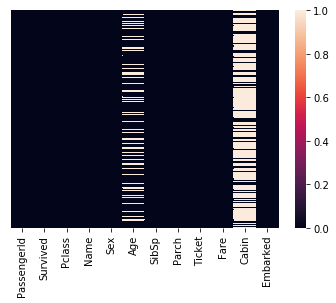

In [11]:
# A heat map to show columns with missing values for train set
sns.heatmap(train_set.isnull(), yticklabels = False, cbar = True)


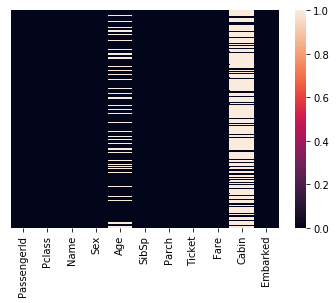

In [12]:
sns.heatmap(test_set.isnull(), yticklabels = False, cbar = True)

In [13]:
# some statistics 
print('Training set:\n')
train_set.describe()


Training set:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
print('\nTest set: ')
test_set.describe()


Test set: 


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


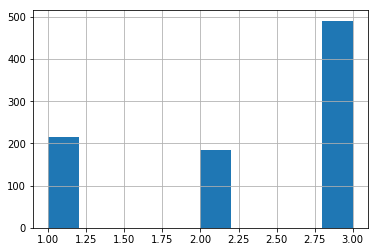

In [15]:
# What Pclass had most passenger

train_set['Pclass'].hist()

No handles with labels found to put in legend.


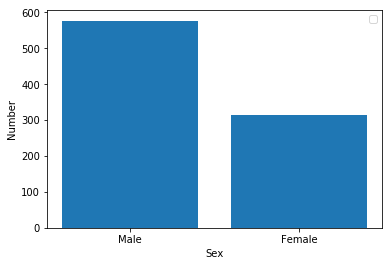

In [16]:
# number of males and females

sex = ['Male', 'Female']
m_number = len(train_set[train_set['Sex']=='male'])
f_number = len(train_set[train_set['Sex']=='female'])
lst = [m_number, f_number]
plt.bar(sex, lst)
plt.xlabel('Sex')
plt.ylabel('Number')
plt.legend()
plt.show()

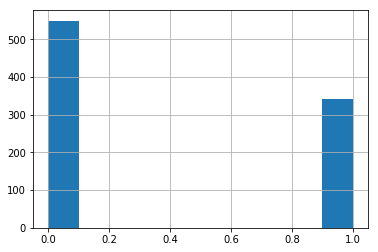

In [17]:
# how many passengers (not)survived
train_set['Survived'].hist()

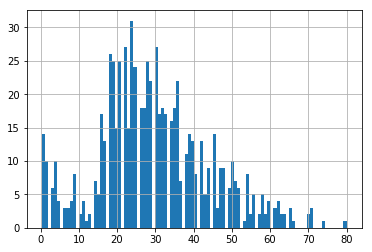

In [18]:
# the distribution of passenger ages
train_set['Age'].hist(bins=100)

No handles with labels found to put in legend.


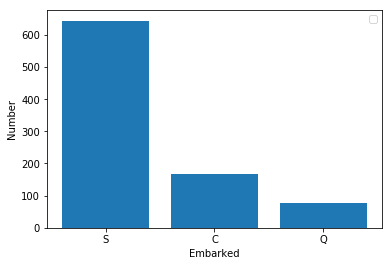

In [19]:
# which port did most passengers embark from
ports = ['S', 'C', 'Q']
S = len(train_set[train_set['Embarked']=='S'])
C = len(train_set[train_set['Embarked']=='C'])
Q = len(train_set[train_set['Embarked']=='Q'])
lst = [S, C, Q]
plt.bar(ports, lst)
plt.xlabel('Embarked')
plt.ylabel('Number')
plt.legend()
plt.show()

No handles with labels found to put in legend.


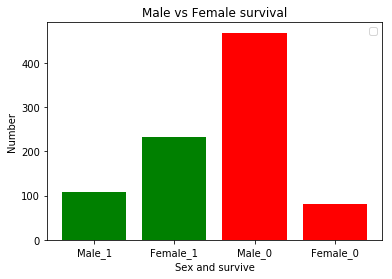

In [20]:
# Survival rates between males and females. 
# Male_1 indicates number of males that survived.

sex = ['Male_1', 'Female_1','Male_0', 'Female_0']
m_number_survive = len(train_set[(train_set['Sex']=='male') & (train_set['Survived']==1)])
f_number_survive = len(train_set[(train_set['Sex']=='female') & (train_set['Survived']==1)])
m_number_not_survive = len(train_set[(train_set['Sex']=='male') & (train_set['Survived']==0)])
f_number_not_survive = len(train_set[(train_set['Sex']=='female') & (train_set['Survived']==0)])

lst = [m_number_survive, f_number_survive,m_number_not_survive, f_number_not_survive]

plt.bar(sex, lst, color = ['Green', 'Green', 'Red', 'Red'])
plt.xlabel('Sex and survive')
plt.ylabel('Number')
plt.title('Male vs Female survival')
plt.legend()
plt.show()

No handles with labels found to put in legend.


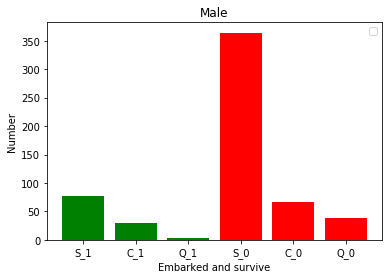

In [21]:
# does the place passengers embarked from affect survival chances
# for males:

ports = ['S_1', 'C_1', 'Q_1', 'S_0', 'C_0','Q_0']

S_1 = len(train_set[(train_set['Embarked']=='S') & (train_set['Sex'] == 'male') & (train_set['Survived']==1)])
C_1 = len(train_set[(train_set['Embarked']=='C') & (train_set['Sex'] == 'male') & (train_set['Survived']==1)])
Q_1 = len(train_set[(train_set['Embarked']=='Q') & (train_set['Sex'] == 'male') & (train_set['Survived']==1)])
S_0 = len(train_set[(train_set['Embarked']=='S') & (train_set['Sex'] == 'male') & (train_set['Survived']==0)])
C_0 = len(train_set[(train_set['Embarked']=='C') & (train_set['Sex'] == 'male') & (train_set['Survived']==0)])
Q_0 = len(train_set[(train_set['Embarked']=='Q') & (train_set['Sex'] == 'male') & (train_set['Survived']==0)])

lst = [S_1, C_1, Q_1, S_0, C_0, Q_0]

plt.bar(ports, lst, color = ['G', 'G', 'G', 'R','R','R'])
plt.xlabel('Embarked and survive')
plt.ylabel('Number')
plt.title('Male')
plt.legend()
plt.show()

No handles with labels found to put in legend.


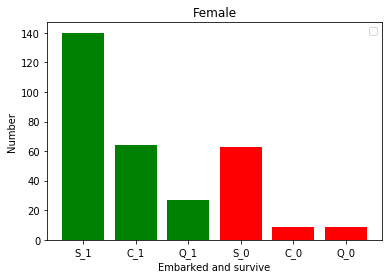

In [22]:
# does the place passengers embarked from affect survival chances
# for females:

ports = ['S_1', 'C_1', 'Q_1', 'S_0', 'C_0','Q_0']

S_1 = len(train_set[(train_set['Embarked']=='S') & (train_set['Sex'] == 'female') & (train_set['Survived']==1)])
C_1 = len(train_set[(train_set['Embarked']=='C') & (train_set['Sex'] == 'female') & (train_set['Survived']==1)])
Q_1 = len(train_set[(train_set['Embarked']=='Q') & (train_set['Sex'] == 'female') & (train_set['Survived']==1)])
S_0 = len(train_set[(train_set['Embarked']=='S') & (train_set['Sex'] == 'female') & (train_set['Survived']==0)])
C_0 = len(train_set[(train_set['Embarked']=='C') & (train_set['Sex'] == 'female') & (train_set['Survived']==0)])
Q_0 = len(train_set[(train_set['Embarked']=='Q') & (train_set['Sex'] == 'female') & (train_set['Survived']==0)])

lst = [S_1, C_1, Q_1, S_0, C_0, Q_0]

plt.bar(ports, lst, color = ['G', 'G', 'G', 'R','R','R'])
plt.xlabel('Embarked and survive')
plt.ylabel('Number')
plt.title('Female')
plt.legend()
plt.show()

In [23]:
# survival rates per class

train_set[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [24]:
# total survival per Sex 

train_set[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [25]:
# did having siblings or spouse help survive
train_set[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
# did having parent or children help survive

train_set[['Parch', 'Survived']].groupby('Parch', as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


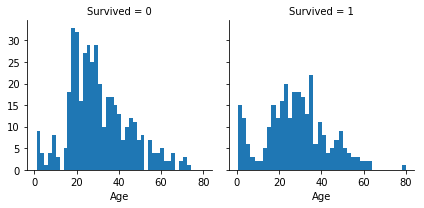

In [27]:
# the distribution of age per survival class

g = sns.FacetGrid(train_set, col = 'Survived')
g.map(plt.hist, 'Age', bins=40)

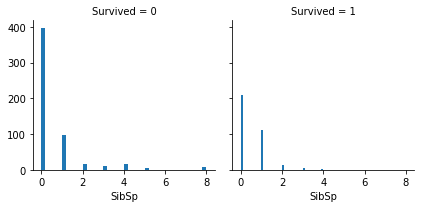

In [29]:
# number of siblings or spouse per survival class

g = sns.FacetGrid(train_set, col = 'Survived')
g.map(plt.hist, 'SibSp', bins=40)

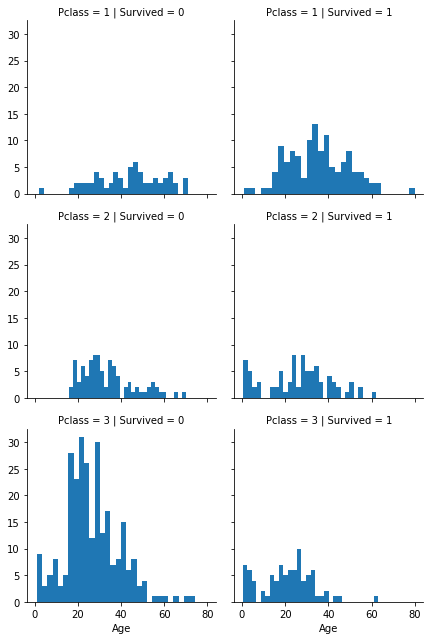

In [30]:
# distribution of age for each Pclass and survival class 

g = sns.FacetGrid(train_set, col = 'Survived', row = 'Pclass', aspect = 1)
g.map(plt.hist, 'Age', bins=30)
g.add_legend()

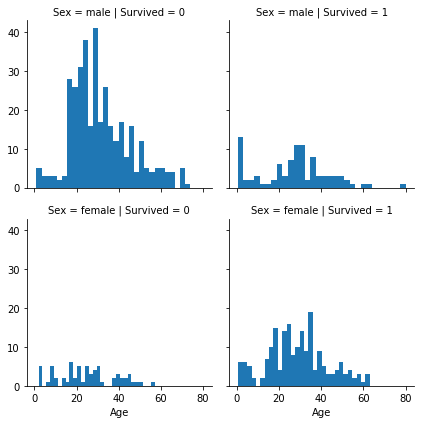

In [31]:
# Distribution of age for each sex and survival class

g = sns.FacetGrid(train_set, col = 'Survived', row = 'Sex')
g.map(plt.hist, 'Age', bins=30)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


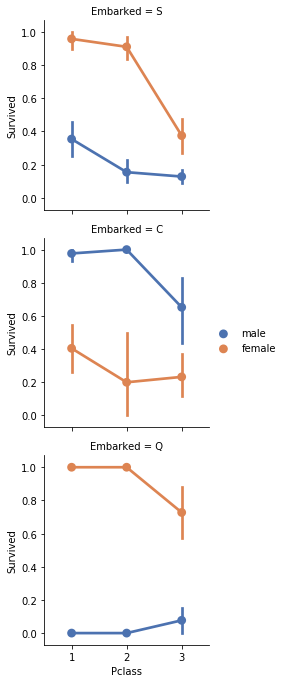

In [32]:
# survival rate for each sex per port of embark

g = sns.FacetGrid(train_set, row = 'Embarked', size = 3.2)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
g.add_legend()

### 2. Data Wrangling/ Feature Engineering

In [33]:
# Now we start by removing the features that are meaningless
# Cabin is mostly empty, Ticket and passID has no real impact

bad_features = ['Cabin', 'Ticket', 'PassengerId']
train_set = train_set.drop(bad_features, axis=1)
test_set = test_set.drop(bad_features, axis=1)
combined = [train_set, test_set]
print('Shape of train: ',train_set.shape, ' Shape of test: ',test_set.shape)

Shape of train:  (891, 9)  Shape of test:  (418, 8)


In [34]:
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [35]:
# next, we can create a new feature relatives 
# which is the sum of SibSp and Parch. Why is that useful? 
# Because at that time people would most certainly trip as a whole family.

for df in combined:
    df['Relatives'] = df['SibSp'] + df['Parch']
    

In [36]:
train_set.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,0
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,0


In [37]:
test_set.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2


In [38]:
# now we can remove the SibSp and Parch features

train_set = train_set.drop(['SibSp', 'Parch'], axis=1)
test_set = test_set.drop(['SibSp', 'Parch'], axis=1)

In [39]:
test_set.tail()

,Pclass,Name,Sex,Age,Fare,Embarked,Relatives
413,3,"Spector, Mr. Woolf",male,NaN,8.0500,S,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000,C,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500,S,0
416,3,"Ware, Mr. Frederick",male,NaN,8.0500,S,0
417,3,"Peter, Master. Michael J",male,NaN,22.3583,C,2


In [40]:
# now we transform the names so that only the titles are left.
# Why is that useful? Because name as it is has no real impact,
# but further analysis show that certain group of people had 
# better chance to survive. We try to build these groups

train_set['Title'] = train_set.Name.str.extract('([A-Za-z]+)\.', expand = False)
test_set['Title'] = test_set.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [41]:
train_set['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [42]:
test_set.tail()

,Pclass,Name,Sex,Age,Fare,Embarked,Relatives,Title
413,3,"Spector, Mr. Woolf",male,NaN,8.0500,S,0,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000,C,0,Dona
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500,S,0,Mr
416,3,"Ware, Mr. Frederick",male,NaN,8.0500,S,0,Mr
417,3,"Peter, Master. Michael J",male,NaN,22.3583,C,2,Master


In [43]:
# Now we can safely remove name feature

train_set = train_set.drop(['Name'], axis=1)

test_set = test_set.drop(['Name'], axis=1)

In [44]:
train_set.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Title
886,0,2,male,27.0,13.00,S,0,Rev
887,1,1,female,19.0,30.00,S,0,Miss
888,0,3,female,NaN,23.45,S,3,Miss
889,1,1,male,26.0,30.00,C,0,Mr
890,0,3,male,32.0,7.75,Q,0,Mr


In [45]:
# Now it is wise to see the average age of each group of titles,
# because this can help us to fill missing ages based on the passengers
# title and the mean/median age for that title group.

train_set[['Title', 'Age']].groupby('Title', as_index=False).mean()

,Title,Age
0,Capt,70.000000
1,Col,58.000000
2,Countess,33.000000
3,Don,40.000000
4,Dr,42.000000
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,4.574167
9,Miss,21.773973


In [46]:
# we also need to see how many people of each title were onboard

pd.crosstab(train_set['Title'], train_set['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [47]:
# we can reduce that list by replacing the odd titles with 'rare'.
# miss, madmosele, ms and madame can be one
# master shall be left as it is

train_set['Title'] = train_set['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr',\
                                                 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')
test_set['Title'] = test_set['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr',\
                                                 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')

In [48]:
train_set['Title'] = train_set['Title'].replace(['Mme', 'Mlle', 'Ms'], 'Miss')
test_set['Title'] = test_set['Title'].replace(['Mme', 'Mlle', 'Ms'], 'Miss')

In [49]:
test_set['Title'] = test_set['Title'].replace('Dona', 'Rare')

In [50]:
test_set.tail()

,Pclass,Sex,Age,Fare,Embarked,Relatives,Title
413,3,male,NaN,8.0500,S,0,Mr
414,1,female,39.0,108.9000,C,0,Rare
415,3,male,38.5,7.2500,S,0,Mr
416,3,male,NaN,8.0500,S,0,Mr
417,3,male,NaN,22.3583,C,2,Master


In [51]:
# now we can see the mean ages per title again

train_set[['Title', 'Age']].groupby('Title', as_index=False).mean()

,Title,Age
0,Master,4.574167
1,Miss,21.860000
2,Mr,32.368090
3,Mrs,35.898148
4,Rare,45.545455


In [52]:
# median age for each title group

train_set[['Title', 'Age']].groupby('Title', as_index=False).median()

,Title,Age
0,Master,3.5
1,Miss,21.5
2,Mr,30.0
3,Mrs,35.0
4,Rare,48.5


In [54]:
# what about title group and survival rates

train_set[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [58]:
# Thus we can see that certain title groups had better survival chance.
# It can be an ordinal feature.

# here we fill the missing age values with the median age value 
# belonging to each title group based on the passengers title


train_set.loc[(train_set.Age.isnull()) & (train_set['Title'] == 'Master'), 'Age'] = 3.5
train_set.loc[(train_set.Age.isnull()) & (train_set['Title'] == 'Mr'), 'Age'] = 30
train_set.loc[(train_set.Age.isnull()) & (train_set['Title'] == 'Mrs'), 'Age'] = 35
train_set.loc[(train_set.Age.isnull()) & (train_set['Title'] == 'Miss'), 'Age'] = 21.5
train_set.loc[(train_set.Age.isnull()) & (train_set['Title'] == 'Rare'), 'Age'] = 48.5

In [59]:
test_set.loc[(test_set.Age.isnull()) & (test_set['Title'] == 'Master'), 'Age'] = 3.5
test_set.loc[(test_set.Age.isnull()) & (test_set['Title'] == 'Mr'), 'Age'] = 30
test_set.loc[(test_set.Age.isnull()) & (test_set['Title'] == 'Mrs'), 'Age'] = 35
test_set.loc[(test_set.Age.isnull()) & (test_set['Title'] == 'Miss'), 'Age'] = 21.5
test_set.loc[(test_set.Age.isnull()) & (test_set['Title'] == 'Rare'), 'Age'] = 48.5

In [69]:
# now we can also fill the missing values in embarked and fare, 
# as there were few missing values we can simply replace them by the mode


train_set['Embarked'].fillna(value = 'S', inplace = True)

In [73]:
test_set['Fare'].fillna(value = test_set['Fare'].dropna().median(), inplace=True)

In [75]:
# now that we do not have any features with missing values,
# we can start by transforming categorical and numerical features
# to ordinal ones based on survival rates. We start by creating 
# age bands to see which age group were most likely to survive

train_set['AgeBand'] = pd.cut(train_set['Age'], 5)
train_set[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean()


,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.327345
2,"(32.252, 48.168]",0.439024
3,"(48.168, 64.084]",0.428571
4,"(64.084, 80.0]",0.090909


In [82]:
# Thus we can create ordinal ages instead of numeric


train_set.loc[train_set['Age'] < 16.5, 'Age'] = 0
train_set.loc[(train_set['Age'] < 32.5) & (train_set['Age'] >= 16.5), 'Age'] = 1
train_set.loc[(train_set['Age'] < 48) & (train_set['Age'] >= 32.5), 'Age'] = 2
train_set.loc[(train_set['Age'] < 64) & (train_set['Age'] >= 48), 'Age'] = 3
train_set.loc[train_set['Age'] >= 64, 'Age'] = 4
    

In [83]:
test_set.loc[test_set['Age'] < 16.5, 'Age'] = 0
test_set.loc[(test_set['Age'] < 32.5) & (test_set['Age'] >= 16.5), 'Age'] = 1
test_set.loc[(test_set['Age'] < 48) & (test_set['Age'] >= 32.5), 'Age'] = 2
test_set.loc[(test_set['Age'] < 64) & (test_set['Age'] >= 48), 'Age'] = 3
test_set.loc[test_set['Age'] >= 64, 'Age'] = 4


In [86]:
# now we don't need age band anymore

train_set.drop(['AgeBand'], axis=1, inplace=True)

In [89]:
# now we can convert male/female to 0/1 because sex affects survival rate as shown above

train_set.loc[train_set['Sex'] == 'male', 'Sex'] = 0
train_set.loc[train_set['Sex'] == 'female', 'Sex'] = 1

In [88]:
test_set.loc[test_set['Sex'] == 'male', 'Sex'] = 0
test_set.loc[test_set['Sex'] == 'female', 'Sex'] = 1

In [91]:
# does it matter how big a family is for survival

train_set[['Relatives', 'Survived']].groupby('Relatives', as_index=False).mean()

,Relatives,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


In [92]:
# also embarked affects survival, therefore we transform it into ordinal values
train_set[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [93]:
train_set.loc[train_set['Embarked'] == 'S', 'Embarked'] = 0
train_set.loc[train_set['Embarked'] == 'C', 'Embarked'] = 1
train_set.loc[train_set['Embarked'] == 'Q', 'Embarked'] = 2

In [94]:
test_set['Embarked'] = test_set['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [96]:
# the title feature also can be converted to ordinal values

train_set['Title'] = train_set['Title'].map({'Master':0, 'Mr':1, 'Mrs':2, 'Miss':3, 'Rare':4}).astype(int)
test_set['Title'] = test_set['Title'].map({'Master':0, 'Mr':1, 'Mrs':2, 'Miss':3, 'Rare':4}).astype(int)


In [99]:
train_set.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Title
0,0,3,0,1.0,7.2500,0,1,1
1,1,1,1,2.0,71.2833,1,1,2
2,1,3,1,1.0,7.9250,0,0,3
3,1,1,1,2.0,53.1000,0,1,2
4,0,3,0,2.0,8.0500,0,0,1


In [100]:
test_set.head()

,Pclass,Sex,Age,Fare,Embarked,Relatives,Title
0,3,0,2.0,7.8292,2,0,1
1,3,1,2.0,7.0000,0,1,2
2,2,0,3.0,9.6875,2,0,1
3,3,0,1.0,8.6625,0,0,1
4,3,1,1.0,12.2875,0,2,2


In [104]:
# similar to age band we can investigate fare by creating fare band

train_set['FareBand'] = pd.qcut(train_set['Fare'], 4)
train_set[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [105]:
# thus we change fare into ordinal values

train_set.loc[ train_set['Fare'] <= 7.91, 'Fare'] = 0
train_set.loc[(train_set['Fare'] > 7.91) & (train_set['Fare'] <= 14.454), 'Fare'] = 1
train_set.loc[(train_set['Fare'] > 14.454) & (train_set['Fare'] <= 31), 'Fare']   = 2
train_set.loc[ train_set['Fare'] > 31, 'Fare'] = 3
train_set['Fare'] = train_set['Fare'].astype(int)

In [106]:

test_set.loc[ test_set['Fare'] <= 7.91, 'Fare'] = 0
test_set.loc[(test_set['Fare'] > 7.91) & (test_set['Fare'] <= 14.454), 'Fare'] = 1
test_set.loc[(test_set['Fare'] > 14.454) & (test_set['Fare'] <= 31), 'Fare']   = 2
test_set.loc[ test_set['Fare'] > 31, 'Fare'] = 3
test_set['Fare'] = test_set['Fare'].astype(int)

In [110]:
# now we can safely remove fare band
train_set.drop(['FareBand'], axis=1,inplace=True)

### 3. Model Validations

In [112]:
y = train_set['Survived'].copy()
X = train_set.copy()
X.drop(['Survived'], axis = 1, inplace= True)


In [128]:
# defining a function to do 5-fold cross validation for each model

def scores(model):
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print('The different accuracy scores: ', score, '\nTheir mean:', score.mean())

#### 3.1 Logistic Regression

In [129]:
logistic_model = LogisticRegression(random_state=0)

scores(logistic_model)

The different accuracy scores:  [0.78212291 0.7877095  0.79775281 0.79213483 0.81355932] 
Their mean: 0.7946558729435946


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

#### 3.2 KNN classifier

In [185]:
knn_model = KNeighborsClassifier(n_neighbors=13)

for n in list(range(1,30,2)):
    model = KNeighborsClassifier(n_neighbors=n)
    scores(model)
    print('For number of neighbors:',n,'\n')

The different accuracy scores:  [0.72625698 0.74860335 0.79213483 0.71910112 0.74576271] 
Their mean: 0.7463718004232234
For number of neighbors: 1 

The different accuracy scores:  [0.76536313 0.78212291 0.80337079 0.81460674 0.83050847] 
Their mean: 0.7991944072371424
For number of neighbors: 3 

The different accuracy scores:  [0.78212291 0.79888268 0.82022472 0.82022472 0.82485876] 
Their mean: 0.8092627563713146
For number of neighbors: 5 

The different accuracy scores:  [0.79329609 0.78212291 0.83146067 0.83146067 0.82485876] 
Their mean: 0.8126398199580324
For number of neighbors: 7 

The different accuracy scores:  [0.69273743 0.77094972 0.83707865 0.8258427  0.83050847] 
Their mean: 0.7914233947457734
For number of neighbors: 9 

The different accuracy scores:  [0.69273743 0.7877095  0.80898876 0.84269663 0.82485876] 
Their mean: 0.7913982155389752
For number of neighbors: 11 

The different accuracy scores:  [0.77653631 0.80446927 0.81460674 0.84269663 0.83615819] 
Their mea

#### 3.3 Naive Bayes classifier

In [141]:
bayes_model = GaussianNB()
scores(bayes_model)

The different accuracy scores:  [0.72625698 0.76536313 0.76966292 0.79213483 0.7740113 ] 
Their mean: 0.7654858327951721


#### 3.4 Stochastic Gradient Descent Classifier

In [150]:
sgd_model = SGDClassifier(alpha=.02,random_state=0)
scores(sgd_model)

The different accuracy scores:  [0.82681564 0.81005587 0.78651685 0.75280899 0.76836158] 
Their mean: 0.7889117865994842


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

#### 3.5 Decision Tree Classifier

In [155]:
tree_model = DecisionTreeClassifier(random_state=0)
scores(tree_model)

The different accuracy scores:  [0.82681564 0.79888268 0.84269663 0.79775281 0.82485876] 
Their mean: 0.818201303857348


#### 3.6 Random Forest classifier

In [158]:
forest_model = RandomForestClassifier(n_estimators=150, random_state=0)

for n in list(range(100,200,20)):
    model = RandomForestClassifier(n_estimators = n, random_state=0)
    scores(model)
    print('For number of estimators: ', n, '\n')

The different accuracy scores:  [0.7877095  0.81005587 0.8258427  0.80898876 0.85875706] 
Their mean: 0.8182707771899084
For number of estimators:  100 

The different accuracy scores:  [0.7877095  0.80446927 0.84269663 0.80898876 0.85875706] 
Their mean: 0.8205242452710081
For number of estimators:  120 

The different accuracy scores:  [0.7877095  0.80446927 0.84269663 0.80898876 0.85875706] 
Their mean: 0.8205242452710081
For number of estimators:  140 

The different accuracy scores:  [0.7877095  0.80446927 0.84269663 0.80898876 0.85875706] 
Their mean: 0.8205242452710081
For number of estimators:  160 

The different accuracy scores:  [0.7877095  0.80446927 0.84269663 0.80898876 0.85875706] 
Their mean: 0.8205242452710081
For number of estimators:  180 



#### 3.7 Extreme Gradient Booster Classifier

In [162]:
xgb_model = XGBClassifier(n_estimators=1000, early_stopping_rounds=5,learning_rate=.05, random_state=0)

for n in list(range(100,1000,200)):
    xgb_model = XGBClassifier(n_estimators=n, early_stopping_rounds=5,learning_rate=.05, random_state=0)
    scores(xgb_model)
    print('For n_estimators: ', n, '\n')

The different accuracy scores:  [0.84357542 0.82122905 0.82022472 0.79213483 0.8700565 ] 
Their mean: 0.8294441034021365
For n_estimators:  100 

The different accuracy scores:  [0.78212291 0.79329609 0.82022472 0.78089888 0.8700565 ] 
Their mean: 0.8093198174188334
For n_estimators:  300 

The different accuracy scores:  [0.78212291 0.7877095  0.84831461 0.79775281 0.86440678] 
Their mean: 0.8160613195251981
For n_estimators:  500 

The different accuracy scores:  [0.79329609 0.77653631 0.84831461 0.78651685 0.86440678] 
Their mean: 0.8138141285139623
For n_estimators:  700 

The different accuracy scores:  [0.79329609 0.78212291 0.83146067 0.78651685 0.85875706] 
Their mean: 0.8104307169300377
For n_estimators:  900 



In [171]:
xgb_model = XGBClassifier(n_estimators=200, early_stopping_rounds=5,learning_rate=.01, random_state=0)
for n in list(range(150,250,20)):
    xgb_model = XGBClassifier(n_estimators=n, early_stopping_rounds=5,learning_rate=.01, random_state=0)
    scores(xgb_model)
    print('For n_estimators: ', n, '\n')

The different accuracy scores:  [0.83798883 0.82681564 0.8258427  0.79213483 0.86440678] 
Their mean: 0.8294377554049296
For n_estimators:  150 

The different accuracy scores:  [0.83798883 0.82681564 0.8258427  0.79213483 0.86440678] 
Their mean: 0.8294377554049296
For n_estimators:  170 

The different accuracy scores:  [0.84916201 0.82681564 0.8258427  0.79213483 0.8700565 ] 
Their mean: 0.8328023357792628
For n_estimators:  190 

The different accuracy scores:  [0.84916201 0.81564246 0.82022472 0.79213483 0.8700565 ] 
Their mean: 0.8294441034021365
For n_estimators:  210 

The different accuracy scores:  [0.84916201 0.81564246 0.82022472 0.79213483 0.8700565 ] 
Their mean: 0.8294441034021365
For n_estimators:  230 



### 4. Model Predictions

In [178]:
# For logistic regression
logistic_model.fit(X,y)
pred = logistic_model.predict(test_set)

output = pd.DataFrame({'PassengerId':passID, 'Survived':pred})
output.to_csv('logistic_model', index=False)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [203]:
# for knn
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X,y)
predicts = knn_model.predict(test_set)

OutpuT = pd.DataFrame({'PassengerId':passID, 'Survived':predicts})
OutpuT.to_csv('KNN_Model', index=False)

In [198]:
# for naive bayes

bayes_model.fit(X,y)
Predicts = bayes_model.predict(test_set)

OutpuT = pd.DataFrame({'PassengerId':passID, 'Survived':Predicts})
OutpuT.to_csv('Naive_Bayes_model', index=False)

In [199]:
# for stochastic gradient descent

sgd_model.fit(X,y)
Predicts = sgd_model.predict(test_set)

OutpuT = pd.DataFrame({'PassengerId':passID, 'Survived':Predicts})
OutpuT.to_csv('sgd_model', index=False)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [200]:
# for decision trees

tree_model.fit(X,y)
Predicts = tree_model.predict(test_set)

OutpuT = pd.DataFrame({'PassengerId':passID, 'Survived':Predicts})
OutpuT.to_csv('Decision_Tree_model', index=False)

In [204]:
# for random forests

forest_model.fit(X,y)
Predicts = forest_model.predict(test_set)

OutpuT = pd.DataFrame({'PassengerId':passID, 'Survived':Predicts})
OutpuT.to_csv('Random_Forest_model', index=False)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [207]:
# for extreme gradient booster

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.01,early_stopping_rounds=5, random_state=0)
xgb_model.fit(X,y)
Predicts = xgb_model.predict(test_set)

OutpuT = pd.DataFrame({'PassengerId':passID, 'Survived':Predicts})
OutpuT.to_csv('xgb_model', index=False)